In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/e_SriLanka_crisis.csv')
df2= pd.read_csv('/content/sriLanka_for_EDA_with_Emotion_Labels.unknown')

In [ ]:
# print(df.head(2))
# print(df2.head())

##Data pre-processing
Fig 1.1 Workflow of data pre-processing


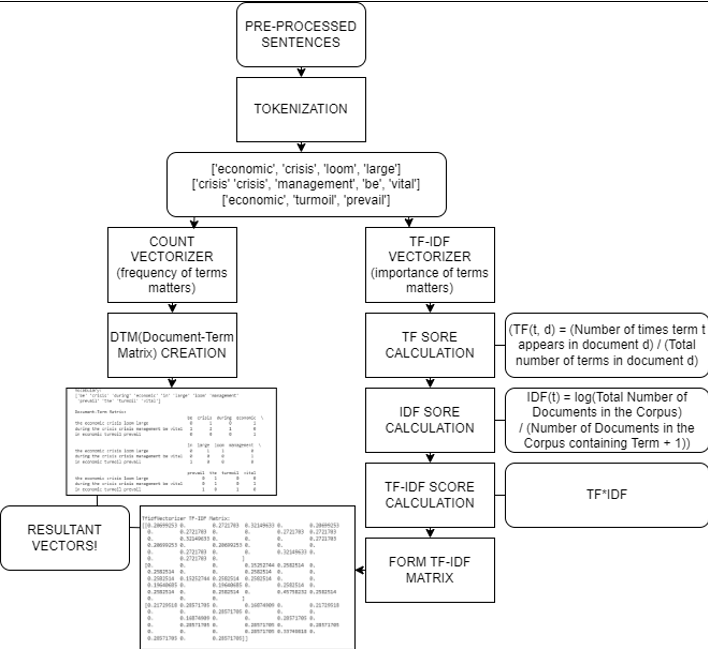




Fig 1.2Workflow of vectorizer

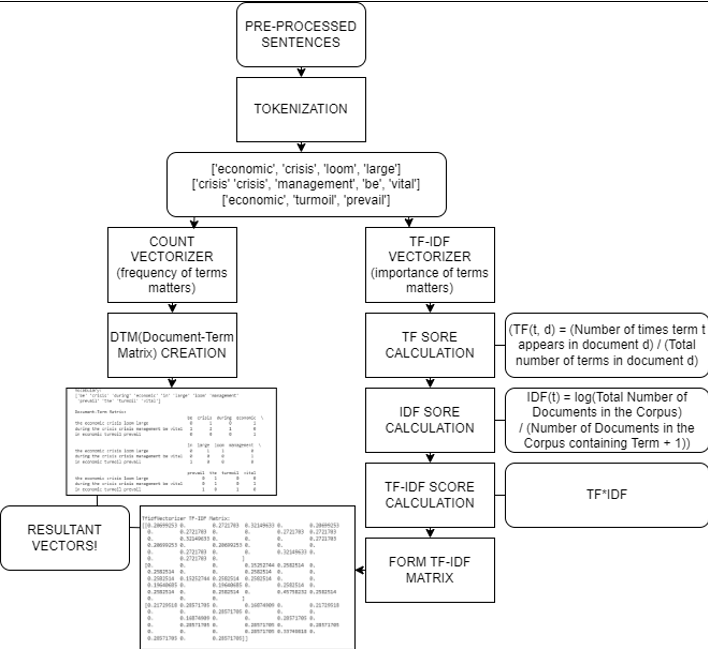

## Cleaning text; df.tweets column

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string



text_data = df["text"]
def preprocess_text(text):
    text = text.lower() #lowercase

    text = text.translate(str.maketrans('', '', string.punctuation)) #punctuation marks

    tokens = word_tokenize(text) #tokenization

    stop_words = set(stopwords.words('english')) #removal of stop words
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df["cleaned_text"] = text_data.apply(preprocess_text)
print(df["cleaned_text"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        people showing disgust military parade moratuw...
1        whats really gon na happen tomorrow srilanka s...
2        lka srilanka economiccrisislk srilankacrisis s...
3        hardhitting queries raised justices matter her...
4        srilanka srilankacrisis srilankaprotests dicta...
                               ...                        
13138    sri lanka news isis sleeper cells prepare ‘ st...
13139    proud stand united muslim sisters tamil brothe...
13140    sri lanka news isis sleeper cells prepare ‘ st...
13141    sri lanka news fifteen killed sri lanka shooto...
13142    sri lanka big four 5minute short countrys top ...
Name: cleaned_text, Length: 13143, dtype: object


In [ ]:
df.shape

(13143, 44)

## Checking for null values

In [ ]:
df.columns

Index(['tweet_avatar', 'images[0]', 'username', 'text', 'in_reply_to/0',
       'in_reply_to/1', 'in_reply_to/2', 'in_reply_to/3', 'in_reply_to/4',
       'replies', 'retweets', 'quotes', 'likes', 'url', 'timestamp',
       'images/0', 'images/1', 'images/2', 'images/3', 'tweet_links/0',
       'tweet_links/1', 'tweet_hashtags/0', 'tweet_hashtags/1',
       'tweet_hashtags/2', 'tweet_hashtags/3', 'tweet_hashtags/4',
       'tweet_hashtags/5', 'tweet_hashtags/6', 'tweet_hashtags/7',
       'tweet_hashtags/8', 'tweet_hashtags/9', 'tweet_hashtags/10',
       'tweet_hashtags/11', 'tweet_hashtags/12', 'tweet_hashtags/13',
       'tweet_hashtags/14', 'tweet_hashtags/15', 'tweet_mentions/0',
       'tweet_mentions/1', 'tweet_mentions/2', 'tweet_mentions/3',
       'tweet_mentions/4', 'Unnamed: 42', 'cleaned_text'],
      dtype='object')

In [ ]:
df.isnull().sum()

tweet_avatar             0
images[0]            13143
username                 0
text                     0
in_reply_to/0        12535
in_reply_to/1        12947
in_reply_to/2        13068
in_reply_to/3        13100
in_reply_to/4        13112
replies                  0
retweets                 0
quotes                   0
likes                    0
url                      0
timestamp                0
images/0              8994
images/1             12302
images/2             12717
images/3             12882
tweet_links/0         6330
tweet_links/1        12197
tweet_hashtags/0      1459
tweet_hashtags/1      1968
tweet_hashtags/2      3524
tweet_hashtags/3      5158
tweet_hashtags/4      6538
tweet_hashtags/5      7683
tweet_hashtags/6      8826
tweet_hashtags/7      9790
tweet_hashtags/8     10542
tweet_hashtags/9     12149
tweet_hashtags/10    12525
tweet_hashtags/11    12897
tweet_hashtags/12    12969
tweet_hashtags/13    13018
tweet_hashtags/14    13058
tweet_hashtags/15    12848
t

In [ ]:
df.drop('images[0]', axis=1, inplace=True)

df.drop('images/0', axis=1, inplace=True)
df.drop('images/1', axis=1, inplace=True)
df.drop('images/2', axis=1, inplace=True)
df.drop('images/3', axis=1, inplace=True)

df.drop('in_reply_to/0', axis=1, inplace=True)
df.drop('in_reply_to/1', axis=1, inplace=True)
df.drop('in_reply_to/2', axis=1, inplace=True)
df.drop('in_reply_to/3', axis=1, inplace=True)
df.drop('in_reply_to/4', axis=1, inplace=True)

df.drop('tweet_links/0', axis=1, inplace=True)
df.drop('tweet_links/1', axis=1, inplace=True)

df.drop('tweet_mentions/0', axis=1, inplace=True)
df.drop('tweet_mentions/1', axis=1, inplace=True)
df.drop('tweet_mentions/2', axis=1, inplace=True)
df.drop('tweet_mentions/3', axis=1, inplace=True)
df.drop('tweet_mentions/4', axis=1, inplace=True)

df.drop('Unnamed: 42',axis=1,inplace=True)

df.drop('tweet_avatar',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

username                 0
text                     0
replies                  0
retweets                 0
quotes                   0
likes                    0
url                      0
timestamp                0
tweet_hashtags/0      1459
tweet_hashtags/1      1968
tweet_hashtags/2      3524
tweet_hashtags/3      5158
tweet_hashtags/4      6538
tweet_hashtags/5      7683
tweet_hashtags/6      8826
tweet_hashtags/7      9790
tweet_hashtags/8     10542
tweet_hashtags/9     12149
tweet_hashtags/10    12525
tweet_hashtags/11    12897
tweet_hashtags/12    12969
tweet_hashtags/13    13018
tweet_hashtags/14    13058
tweet_hashtags/15    12848
cleaned_text             0
dtype: int64

##Combining Hashtag columns

In [ ]:
df['combined_hashtags'] = df['tweet_hashtags/0'].fillna('')

for i in range(1, 16):
    df['combined_hashtags'] += ' ' + df[f'tweet_hashtags/{i}'].fillna('')

columns_to_drop = [f'tweet_hashtags/{i}' for i in range(16)]
df.drop(columns=columns_to_drop, inplace=True)

##Adding 'pred_emo' and 'emo_label' columns from df2 to df

In [ ]:
df2 = df2[df2['language'] == 'en']
# df2.head()
# df2.shape
df2.language.value_counts()

en    13158
Name: language, dtype: int64

In [ ]:
df['pred_emo']= df2['pred_emo']
df['emo_label']= df2['emo_label']
df.head(2)

,username,text,replies,retweets,quotes,likes,url,timestamp,cleaned_text,combined_hashtags,pred_emo,emo_label
0,@Welikumbura,People showing their disgust for a military pa...,65,131,18,563,https://twitter.com/Welikumbura/status/1630620...,2023-02-28 17:27:00+00:00,people showing disgust military parade moratuw...,#Moratuwa #lka #SriLanka #GoHomeRanil #ShutupA...,4.0,Fear
1,@pslakshann,so what's really gonna happen tomorrow?\n#SriL...,0,0,0,0,https://twitter.com/pslakshann/status/16306088...,2023-02-28 16:40:00+00:00,whats really gon na happen tomorrow srilanka s...,#SriLanka #SriLankaCrisis,1.0,Happy


In [ ]:
df.isna().sum()

username                0
text                    0
replies                 0
retweets                0
quotes                  0
likes                   0
url                     0
timestamp               0
cleaned_text            0
combined_hashtags       0
pred_emo             1599
emo_label            1599
dtype: int64

In [ ]:
import pandas as pd #imputing
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df['pred_emo'] = imputer.fit_transform(df[['pred_emo']])
df.pred_emo.value_counts()

1.000000    4524
0.000000    1660
5.000000    1649
2.117464    1599
3.000000    1579
4.000000    1337
2.000000     795
Name: pred_emo, dtype: int64

In [ ]:
df["pred_emo"]=df['pred_emo'].round().astype(int)

In [ ]:
df["pred_emo"].value_counts()

1    4524
2    2394
0    1660
5    1649
3    1579
4    1337
Name: pred_emo, dtype: int64

In [ ]:
df = df.drop('emo_label', axis=1)

In [ ]:
mapping = {0: 'Sad', 1: 'Happy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

df['emo_label'] = df['pred_emo'].map(mapping)

In [ ]:
df.emo_label.isna().sum()

0

##Forming the final csv

In [ ]:
features= ['username',
           'timestamp',
           'text',
           'cleaned_text',
           'pred_emo',
           'emo_label',
           'replies',
           'retweets',
           'quotes',
           'likes',
           'combined_hashtags'
           ]

df= df[features]
df.head(2)

,username,timestamp,text,cleaned_text,pred_emo,emo_label,replies,retweets,quotes,likes,combined_hashtags
0,@Welikumbura,2023-02-28 17:27:00+00:00,People showing their disgust for a military pa...,people showing disgust military parade moratuw...,4,Fear,65,131,18,563,#Moratuwa #lka #SriLanka #GoHomeRanil #ShutupA...
1,@pslakshann,2023-02-28 16:40:00+00:00,so what's really gonna happen tomorrow?\n#SriL...,whats really gon na happen tomorrow srilanka s...,1,Happy,0,0,0,0,#SriLanka #SriLankaCrisis


In [ ]:
df.to_csv('EDA_Dataset_Final.csv')

#Model Deployment
Fig 1.4 Workflow of model deployment


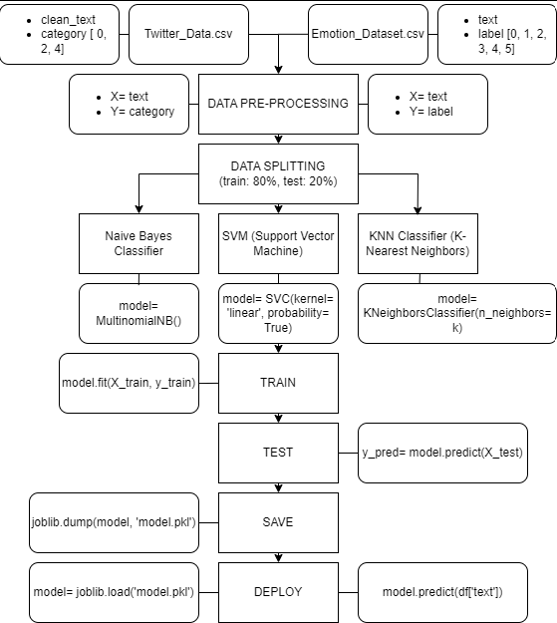

##Naive Bayes Emotion
Fig 1.5 ROC curve for Naive Bayes Emotion model


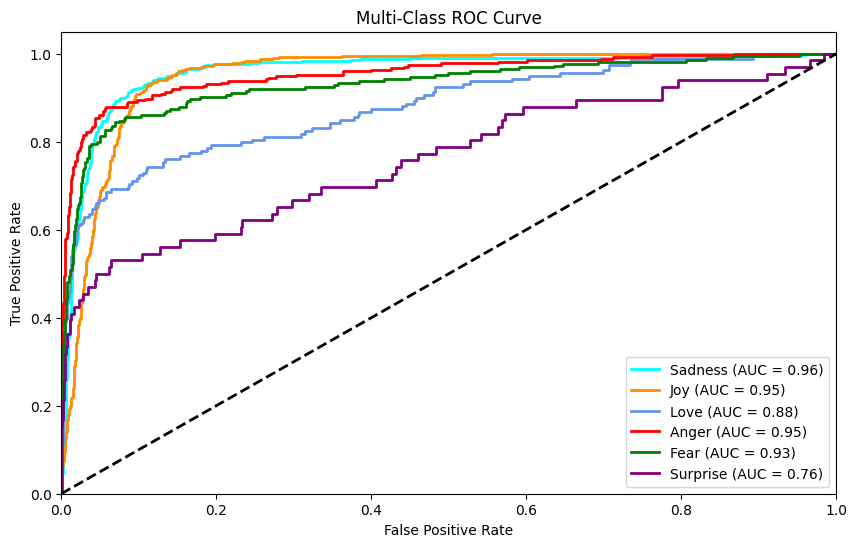

###Running the model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import re
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix

nltk.download('wordnet')
nltk.download('stopwords')

train = pd.read_csv('/content/training.csv', encoding='latin-1')
test = pd.read_csv('/content/test.csv', encoding='latin-1')
validation = pd.read_csv('/content/validation.csv', encoding='latin-1')

train = pd.concat([train, validation], ignore_index=True)

X_train = train['text']
y_train = train['label']

X_test = test['text']
y_test = test['label']

emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

def text_cleaning(text):
    # Remove special characters and punctuation
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removing @mentions
    text = re.sub(r'#', '', text)  # Removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?://\S+', '', text)  # Removing hyperlinks
    text = re.sub(r'&[a-z;]+', '', text)  # Removing '&gt;'

    # Tokenization
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
nb_classifier_count = MultinomialNB()
nb_classifier_count.fit(X_train_count, y_train)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MultinomialNB()

In [ ]:
X_test_count = count_vectorizer.transform(X_test)
y_pred = nb_classifier_count.predict(X_test_count)

###Exporting the model

In [ ]:
import joblib
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')
joblib.dump(cnb_classifier_count, 'nb_classifier.pkl')

### Accuracy and Classification Report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred, target_names=emotion_mapping.values())

print(f"Test Data Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Test Data Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

     Sadness       0.74      0.94      0.83       581
         Joy       0.75      0.97      0.85       695
        Love       0.91      0.26      0.41       159
       Anger       0.93      0.60      0.73       275
        Fear       0.83      0.54      0.66       224
    Surprise       0.00      0.00      0.00        66

    accuracy                           0.77      2000
   macro avg       0.69      0.55      0.58      2000
weighted avg       0.77      0.77      0.74      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Jaccard'ex Index and Gini Index

In [ ]:
jaccard_scores = {}
for i in range(n_classes):
    jaccard_scores[emotion_mapping[i]] = jaccard_score(y_test == i, y_pred == i)

def gini_index(y_true, y_pred):
    sorted_indices = y_pred.argsort()
    y_true_sorted = y_true[sorted_indices]
    n = len(y_true_sorted)
    coef = 2.0 / n
    const = (n + 1) / n
    weighted_absolute_difference = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    gini = np.sum(weighted_absolute_difference) / n - const
    return gini

gini_scores = {}
for i in range(n_classes):
    gini_scores[emotion_mapping[i]] = gini_index(y_test == i, y_pred == i)

print("Jaccard scores: ", jaccard_scores)
print("Gini scores: ", gini_scores)

Jaccard scores:  {'Sadness': 0.705045278137128, 'Joy': 0.7336244541484717, 'Love': 0.25766871165644173, 'Anger': 0.5694444444444444, 'Fear': 0.4899598393574297, 'Surprise': 0.0}
Gini scores:  {'Sadness': -0.7831342512908778, 'Joy': -0.7591446043165466, 'Love': -0.6288553459119497, 'Anger': -0.761650909090909, 'Fear': -0.748549107142857, 'Surprise': -0.46118181818181814}


###AUC-ROC Curve

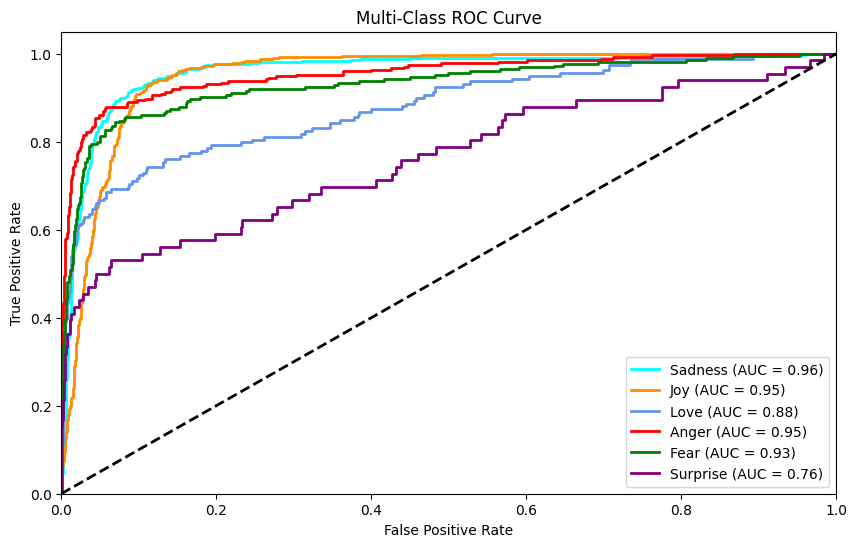

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

y_pred_prob = nb_classifier_count.predict_proba(X_test_count)

n_classes = len(emotion_mapping)
fpr = [None] * n_classes
tpr = [None] * n_classes
roc_auc = [None] * n_classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{emotion_mapping[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

###Sensitivity Analysis

In [ ]:
word_to_analyze = "happy"

perturbed_text = X_test.apply(lambda x: x.replace(word_to_analyze, "joyful"))

X_perturbed = count_vectorizer.transform(perturbed_text)
y_perturbed = nb_classifier_count.predict(X_perturbed)

difference = (y_perturbed != y_pred).sum()
print(f"Number of instances with different predictions after perturbation: {difference}")

perturbed_text_synonym = X_test.apply(lambda x: x.replace(word_to_analyze, "joyful"))
X_perturbed_synonym = count_vectorizer.transform(perturbed_text_synonym)
y_perturbed_synonym = nb_classifier_count.predict(X_perturbed_synonym)

difference_synonym = (y_perturbed_synonym != y_pred).sum()
print(f"Number of instances with different predictions after synonym replacement: {difference_synonym}")

perturbed_text_negation = X_test.apply(lambda x: x.replace(word_to_analyze, "not happy"))
X_perturbed_negation = count_vectorizer.transform(perturbed_text_negation)
y_perturbed_negation = nb_classifier_count.predict(X_perturbed_negation)

difference_negation = (y_perturbed_negation != y_pred).sum()
print(f"Number of instances with different predictions after negation: {difference_negation}")

perturbed_text_removal = X_test.apply(lambda x: x.replace(word_to_analyze, ""))
X_perturbed_removal = count_vectorizer.transform(perturbed_text_removal)
y_perturbed_removal = nb_classifier_count.predict(X_perturbed_removal)

difference_removal = (y_perturbed_removal != y_pred).sum()
print(f"Number of instances with different predictions after word removal: {difference_removal}")

Number of instances with different predictions after perturbation: 0
Number of instances with different predictions after synonym replacement: 0
Number of instances with different predictions after negation: 0
Number of instances with different predictions after word removal: 0


###True Positive and False Positive Rates

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

TPR = {}
for i in range(n_classes):
    TP = confusion_mat[i, i]  # Diagonal element of the confusion matrix represents TP
    TPR[emotion_mapping[i]] = TP / sum(confusion_mat[i, :])
print("True Positive Rate: ", TPR)

FPR = {}
for i in range(n_classes):
    FP = sum(confusion_mat[i, :]) - confusion_mat[i, i]

    actual_negatives = sum(confusion_mat[:, i]) - confusion_mat[i, i]

    FPR[emotion_mapping[i]] = FP / actual_negatives
print("Flase Positive Rate:", FPR)

True Positive Rate:  {'Sadness': 0.9380378657487092, 'Joy': 0.9669064748201439, 'Love': 0.2641509433962264, 'Anger': 0.5963636363636363, 'Fear': 0.5446428571428571, 'Surprise': 0.0}
Flase Positive Rate: {'Sadness': 0.1875, 'Joy': 0.10407239819004525, 'Love': 29.25, 'Anger': 8.538461538461538, 'Fear': 4.08, 'Surprise': inf}


<ipython-input-38-1c5bc8a2c59c>:21: RuntimeWarning: divide by zero encountered in long_scalars
  FPR[emotion_mapping[i]] = FP / actual_negatives


###Confusion Matrix

In [ ]:
print(confusion_mat)

[[545  29   0   3   4   0]
 [ 17 672   4   0   2   0]
 [ 28  87  42   1   1   0]
 [ 63  42   0 164   6   0]
 [ 60  33   0   9 122   0]
 [ 24  30   0   0  12   0]]


##SVM Emotion
Fig 1.6 RoC curve SVM Emotion model
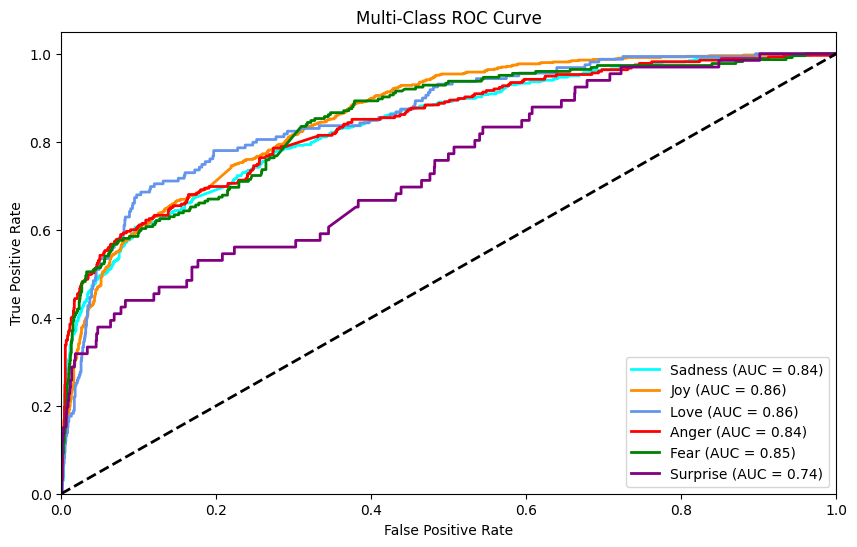

###Running the model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import re
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

train = pd.read_csv('/content/training.csv', encoding='latin-1')
test = pd.read_csv('/content/test.csv', encoding='latin-1')
validation = pd.read_csv('/content/validation.csv', encoding='latin-1')

train = pd.concat([train, validation], ignore_index=True)

X_train = train['text']
y_train = train['label']

X_test = test['text']
y_test = test['label']

emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

def text_cleaning(text):
    # Remove special characters and punctuation
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removing @mentions
    text = re.sub(r'#', '', text)  # Removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?://\S+', '', text)  # Removing hyperlinks
    text = re.sub(r'&[a-z;]+', '', text)  # Removing '&gt;'

    # Tokenization
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

vectorizer = CountVectorizer(binary=True, stop_words='english')

vectorizer.fit(list(X))

x_train_vec = vectorizer.transform(X_train)

svm = SVC(kernel='linear', probability=True)

scores = cross_val_score(svm, x_train_vec, y_train, cv=5)  # 5-fold cross-validation

s=svm.fit(x_train_vec, y_train)

In [ ]:
x_test_vec = vectorizer.transform(X_test)
y_pred_svm = svm.predict(x_test_vec)

###Exporting the model

In [ ]:
import joblib
joblib.dump(s, 'svm.pkl')

### Accuracy and Classification Report

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)

classification_rep = classification_report(y_test, y_pred_svm, target_names=emotion_mapping.values())

print(f"Test Data Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Test Data Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

     Sadness       0.61      0.66      0.63       581
         Joy       0.60      0.76      0.67       695
        Love       0.47      0.38      0.42       159
       Anger       0.73      0.48      0.58       275
        Fear       0.66      0.44      0.53       224
    Surprise       0.36      0.18      0.24        66

    accuracy                           0.61      2000
   macro avg       0.57      0.48      0.51      2000
weighted avg       0.61      0.61      0.60      2000




###Jaccard'ex Index and Gini Index

In [ ]:
jaccard_scores = {}
for i in range(n_classes):
    jaccard_scores[emotion_mapping[i]] = jaccard_score(y_test == i, y_pred_svm == i)

def gini_index(y_true, y_pred):
    sorted_indices = y_pred_svm.argsort()
    y_true_sorted = y_true[sorted_indices]
    n = len(y_true_sorted)
    coef = 2.0 / n
    const = (n + 1) / n
    weighted_absolute_difference = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    gini = np.sum(weighted_absolute_difference) / n - const
    return gini

gini_scores = {}
for i in range(n_classes):
    gini_scores[emotion_mapping[i]] = gini_index(y_test == i, y_pred_svm == i)

print("Jaccard scores: ", jaccard_scores)
print("Gini scores: ", gini_scores)

Jaccard scores:  {'Sadness': 0.463680387409201, 'Joy': 0.5052531041069723, 'Love': 0.2687224669603524}
Gini scores:  {'Sadness': -0.3267108433734939, 'Joy': -0.5075582733812949, 'Love': -0.6038176100628929}


###AUC-ROC Curve

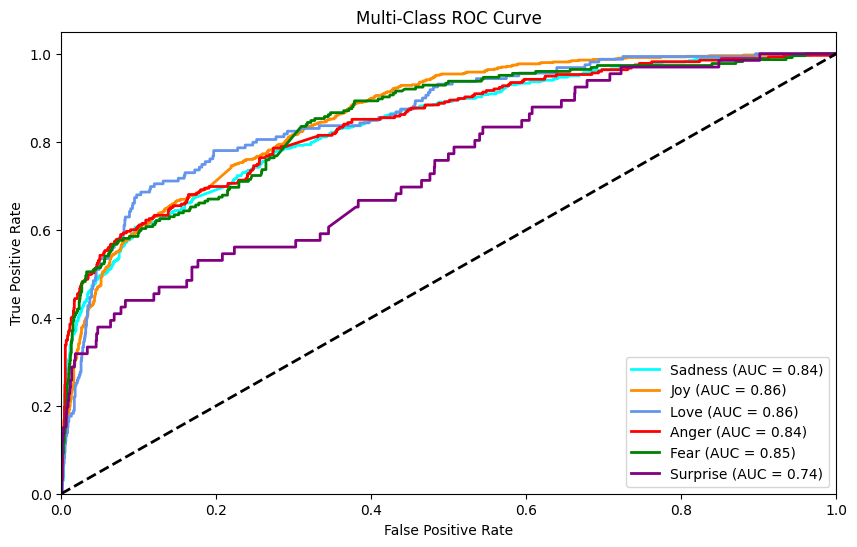

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

y_pred_prob = svm.predict_proba(x_test_vec)

n_classes = len(emotion_mapping)
fpr = [None] * n_classes
tpr = [None] * n_classes
roc_auc = [None] * n_classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{emotion_mapping[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

###Sensitivity Analysis

In [ ]:
word_to_analyze = "happy"

perturbed_text = X_test.apply(lambda x: x.replace(word_to_analyze, "joyful"))

X_perturbed = count_vectorizer.transform(perturbed_text)
y_perturbed = nb_classifier_count.predict(X_perturbed)

difference = (y_perturbed != y_pred_svm).sum()
print(f"Number of instances with different predictions after perturbation: {difference}")

perturbed_text_synonym = X_test.apply(lambda x: x.replace(word_to_analyze, "joyful"))
X_perturbed_synonym = count_vectorizer.transform(perturbed_text_synonym)
y_perturbed_synonym = nb_classifier_count.predict(X_perturbed_synonym)

difference_synonym = (y_perturbed_synonym != y_pred_svm).sum()
print(f"Number of instances with different predictions after synonym replacement: {difference_synonym}")

perturbed_text_negation = X_test.apply(lambda x: x.replace(word_to_analyze, "not happy"))
X_perturbed_negation = count_vectorizer.transform(perturbed_text_negation)
y_perturbed_negation = nb_classifier_count.predict(X_perturbed_negation)

difference_negation = (y_perturbed_negation != y_pred_svm).sum()
print(f"Number of instances with different predictions after negation: {difference_negation}")

perturbed_text_removal = X_test.apply(lambda x: x.replace(word_to_analyze, ""))
X_perturbed_removal = count_vectorizer.transform(perturbed_text_removal)
y_perturbed_removal = nb_classifier_count.predict(X_perturbed_removal)

difference_removal = (y_perturbed_removal != y_pred_svm).sum()
print(f"Number of instances with different predictions after word removal: {difference_removal}")


Number of instances with different predictions after perturbation: 1183
Number of instances with different predictions after synonym replacement: 1183
Number of instances with different predictions after negation: 1183
Number of instances with different predictions after word removal: 1183


###True Positive and False Positive Rates



In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_svm)

TPR = {}
for i in range(n_classes):
    TP = confusion_mat[i, i]
    TPR[emotion_mapping[i]] = TP / sum(confusion_mat[i, :])
print("True Positive Rate: ", TPR)

FPR = {}
for i in range(n_classes):
    FP = sum(confusion_mat[i, :]) - confusion_mat[i, i]

    actual_negatives = sum(confusion_mat[:, i]) - confusion_mat[i, i]

    FPR[emotion_mapping[i]] = FP / actual_negatives
print("Flase Positive Rate:", FPR)

True Positive Rate:  {'Sadness': 0.6592082616179001, 'Joy': 0.7611510791366907, 'Love': 0.3836477987421384, 'Anger': 0.4763636363636364, 'Fear': 0.4419642857142857, 'Surprise': 0.18181818181818182}
Flase Positive Rate: {'Sadness': 0.8081632653061225, 'Joy': 0.4715909090909091, 'Love': 1.4411764705882353, 'Anger': 3.0, 'Fear': 2.450980392156863, 'Surprise': 2.5714285714285716}


###Confusion Matrix

In [ ]:
print(confusion_mat)

[[383 132  14  23  23   6]
 [ 95 529  43  14  12   2]
 [ 23  65  61   5   3   2]
 [ 72  61   7 131   2   2]
 [ 41  67   4   4  99   9]
 [ 14  27   0   2  11  12]]


##Importing models
Fig 1.7 Model Accuracy comparison


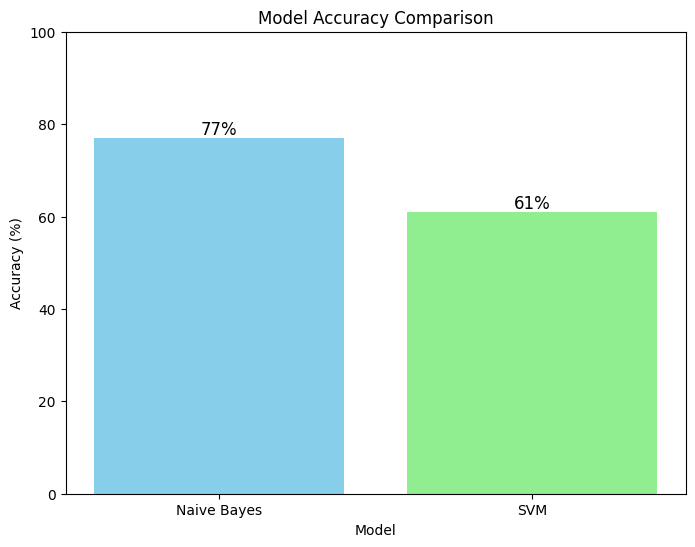

In [ ]:
# vectorizer = joblib.load('/content/vectorizer.pkl')
# mmodel_emotion= joblib.load('/content/model_sentiment.pkl')

#EDA

In [ ]:
data= pd.read_csv('/content/EDA_Dataset_Final.csv')
data= data.drop('Unnamed: 0', axis= 1)
data.head(2)

,username,timestamp,text,cleaned_text,pred_emo,emo_label,replies,retweets,quotes,likes,combined_hashtags
0,@Welikumbura,2023-02-28 17:27:00+00:00,People showing their disgust for a military pa...,people showing disgust military parade moratuw...,4,Fear,65,131,18,563,#Moratuwa #lka #SriLanka #GoHomeRanil #ShutupA...
1,@pslakshann,2023-02-28 16:40:00+00:00,so what's really gonna happen tomorrow?\n#SriL...,whats really gon na happen tomorrow srilanka s...,1,Happy,0,0,0,0,#SriLanka #SriLankaCrisis


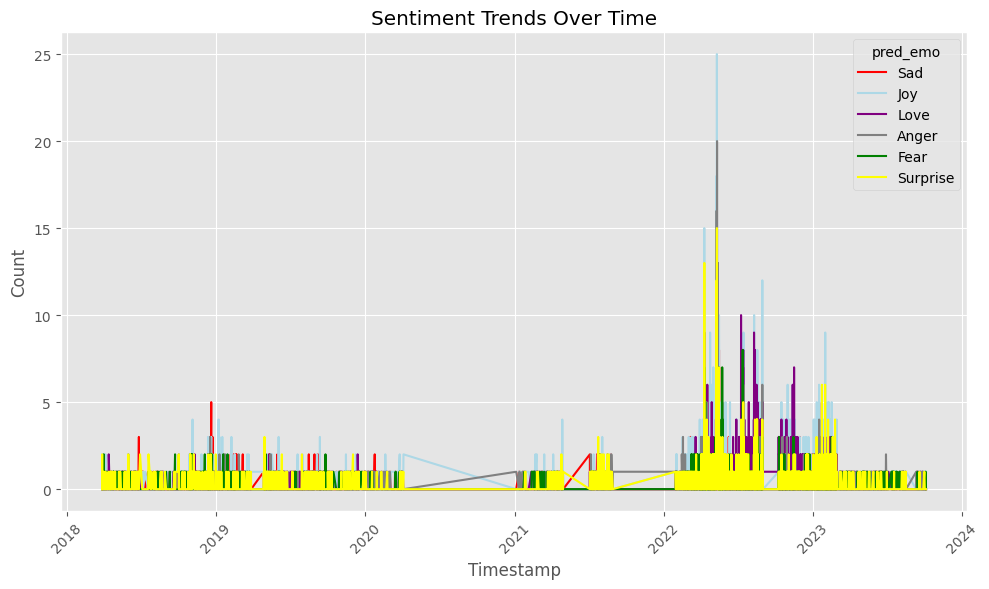

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data.set_index('timestamp', inplace=True)

data['count'] = 1

sentiment_counts = data.groupby([pd.Grouper(freq='H'), 'pred_emo']).count().unstack(fill_value=0) #resampling

colors = ['red', 'lightblue', 'purple', 'grey', 'green', 'yellow']

plt.figure(figsize=(10, 6)) #line chart

emotion_mapping = {0: 'Sad', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

for label, color in enumerate(colors):
    emotion = emotion_mapping.get(label, f'Label {label}')
    plt.plot(sentiment_counts.index, sentiment_counts['count'][label], label=emotion, color=color)


plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Time')
plt.legend(title='pred_emo')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Inferences from time series plot
a)-During lockdown period from December 2019 to December 2021,sentiment label 4 denoting fear and label 5 denoting surprise can be observed.

b-) Protest began from 2021 against President Gotabaya Rajapaksa’s ruling government’s inefficiency in balancing external debt and handling after covid critical situations, people where disappointed due to implementation of policies like organic farming. So all emotions started raising from these period.

c-) On 9 July 2022, amid reports that their homes were stormed and burned, Gotabaya and Wickremesinghe both agreed to resign from their respective posts as Sri Lanka’s president and Prime Minister. Thus, sudden increase in label 1 denoting joy sentiment among people.


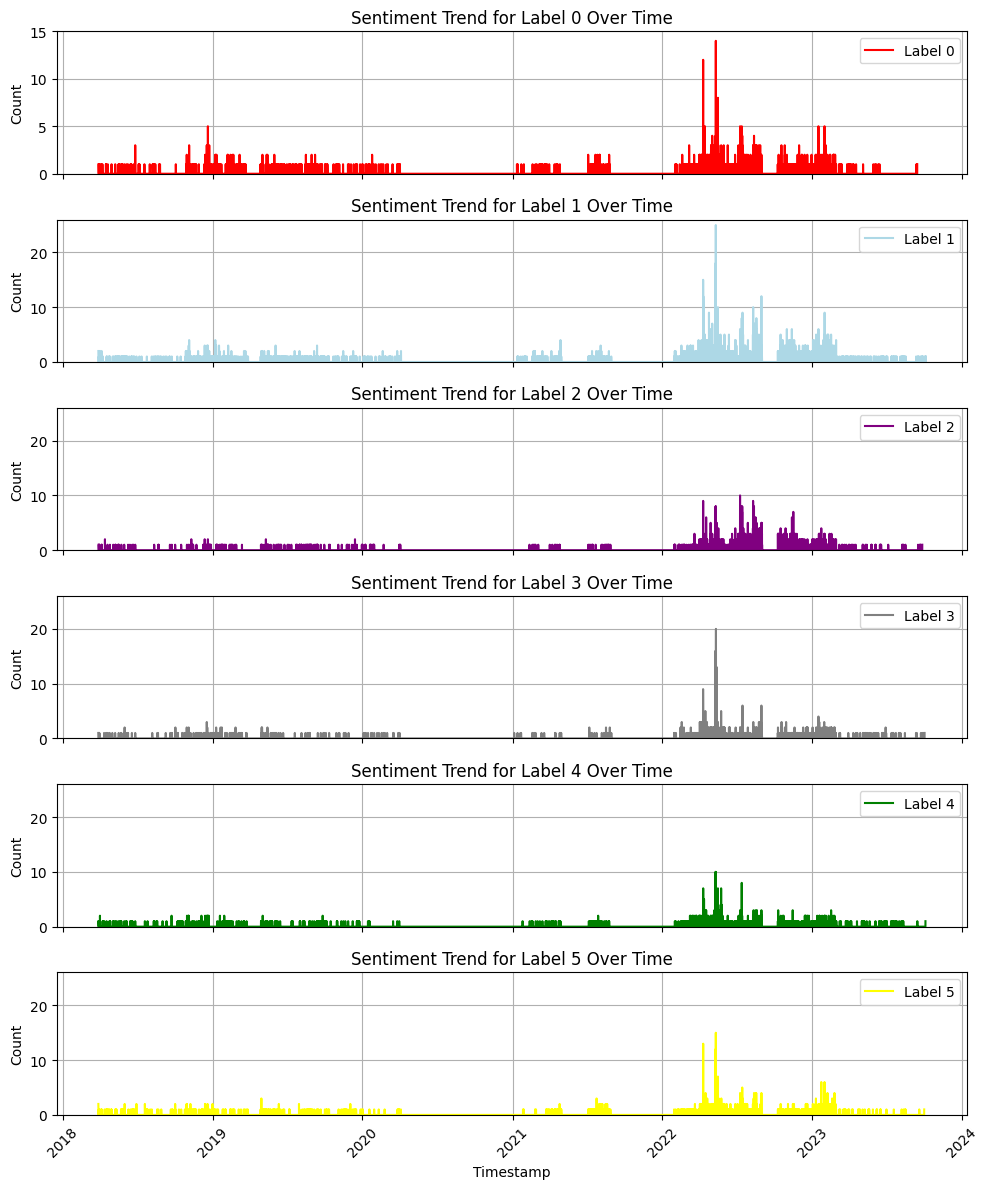

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['timestamp'] = pd.to_datetime(data['timestamp'])

data.set_index('timestamp', inplace=True)

data['count'] = 1

colors = ['red', 'lightblue', 'purple', 'grey', 'green', 'yellow']

fig, axs = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

# Initialize variables to store the maximum count across all plots
max_count = 0

for label, color, ax in zip(range(6), colors, axs):
    sentiment_counts = data[data['pred_emo'] == label].resample('H').count()

    # Update max_count with the maximum count in this subplot
    max_count = max(max_count, sentiment_counts['count'].max())

    ax.plot(sentiment_counts.index, sentiment_counts['count'], label=f'Label {label}', color=color)
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Trend for Label {label} Over Time')
    ax.grid(True)
    ax.legend()

    # Set the same y-axis limits for all subplots
    ax.set_ylim(0, max_count + 1)

plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


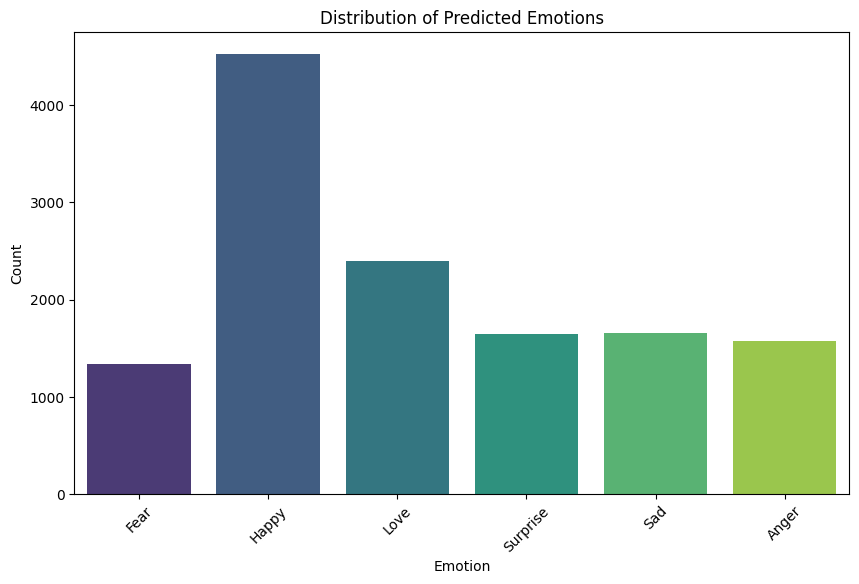

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='emo_label', palette='viridis')
plt.title('Distribution of Predicted Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

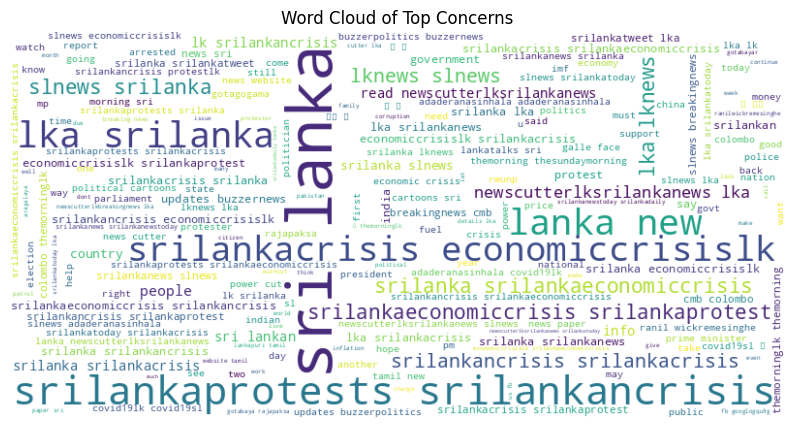

In [ ]:
from wordcloud import WordCloud

concerns_text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concerns_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Concerns')
plt.show()

##Word cloud of top concerns
A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance within a given set of text. They visually summarize the most common words or themes in a body of text to provide a quick overview of the main topics or trends.Here word cloud represents the top keywords from tweets.

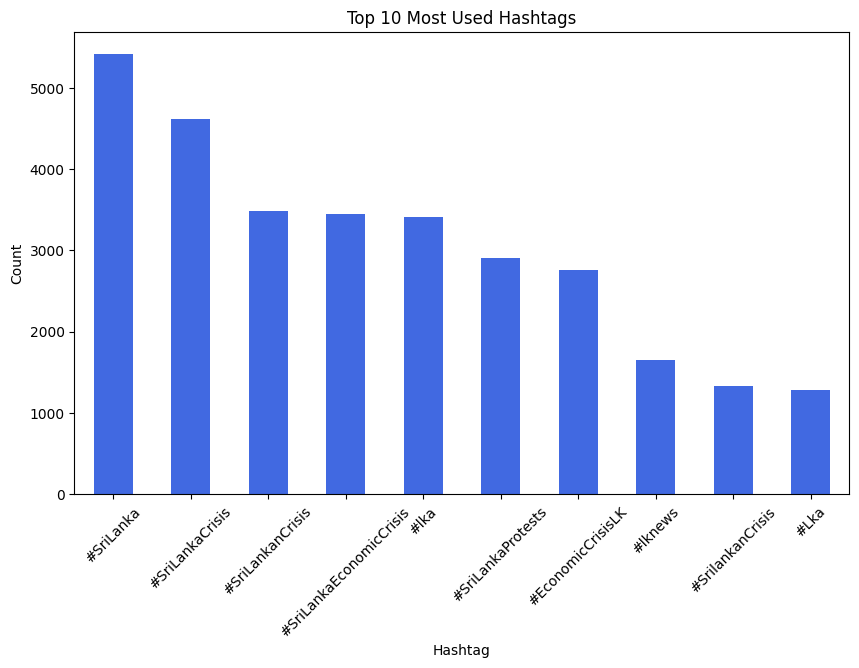

In [ ]:
hashtags = data['combined_hashtags'].str.split().explode()
top_hashtags = hashtags.value_counts().nlargest(10)
# Create a bar plot of the top 10 most used hashtags
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='bar', color='royalblue')
plt.title('Top 10 Most Used Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

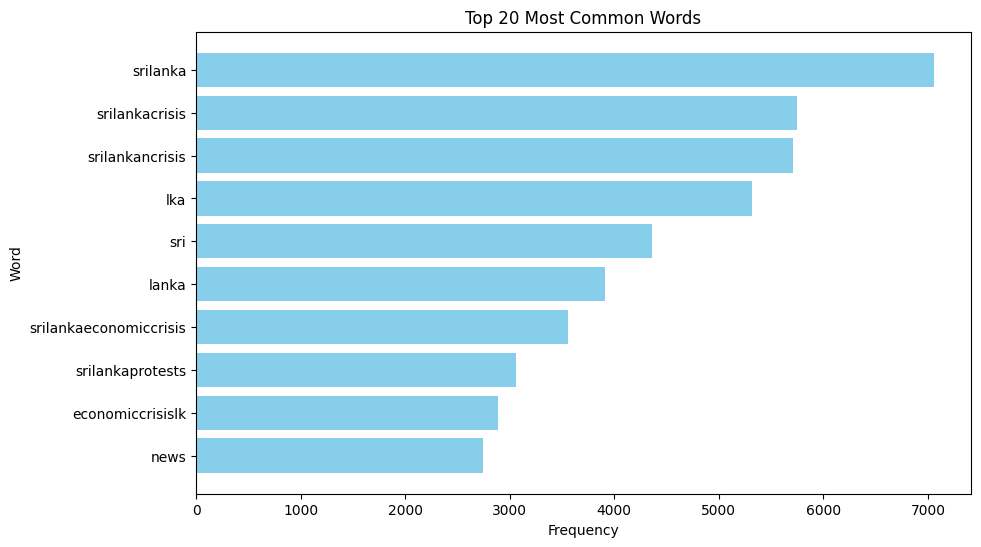

In [ ]:
from collections import Counter

text_data = data['cleaned_text']

words = ' '.join(text_data).split()
word_freq = Counter(words)

# Plot the most common words
common_words = word_freq.most_common(10)
common_words, freq = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.barh(common_words, freq, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()

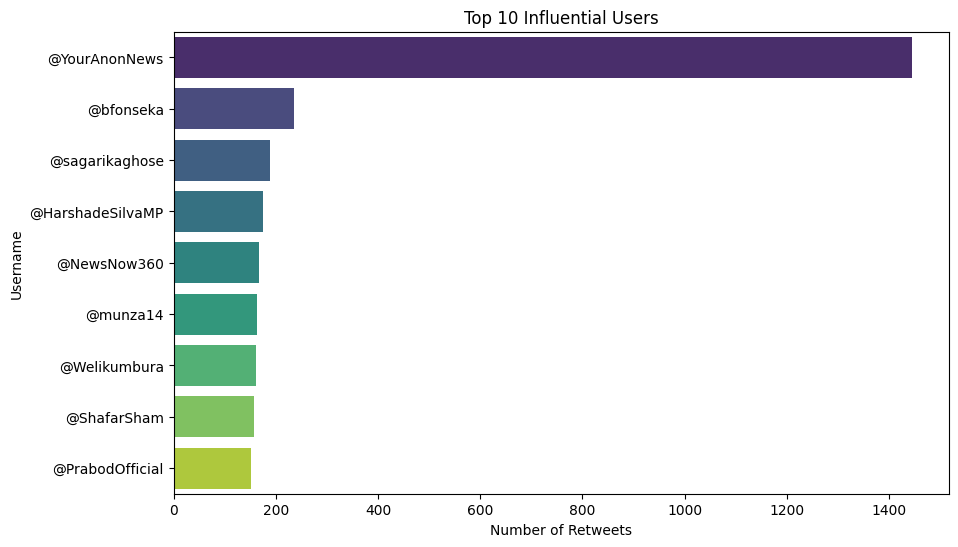

In [ ]:
influential_users = data.nlargest(10, 'retweets')
plt.figure(figsize=(10, 6))
sns.barplot(data=influential_users, x='retweets', y='username', palette='viridis')
plt.title('Top 10 Influential Users')
plt.xlabel('Number of Retweets')
plt.ylabel('Username')
plt.show()

## Bar plot of top 10 influential users
This barplot of username vs number of tweets gives an idea  retweets related to SriLanka crisis trendy hashtags which could be further used to as a means to spread solidarity during crisis times like government can approach those users to spread positivity and maintain the intensity of angerness among people by using hashtags like “#Crisisrelief”,”#United against crisis”,”#Resilience in SriLanaka” and “#Stand with SriLanka”.

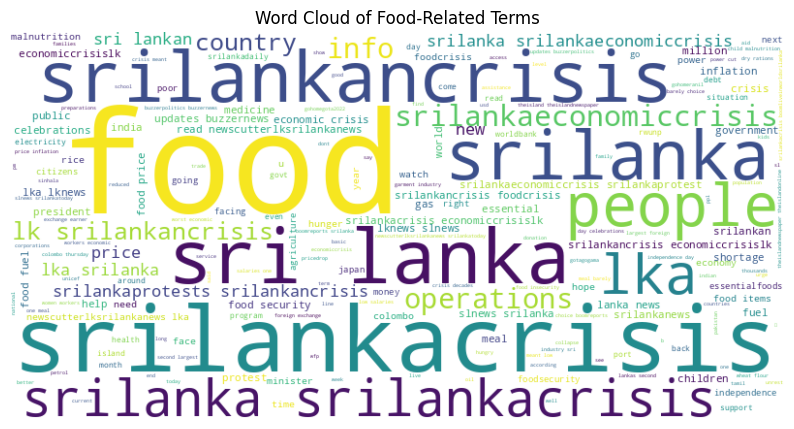

In [ ]:
food_tweets_text = ' '.join(food_related_data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(food_tweets_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Food-Related Terms')
plt.show()

###Word cloud of food related items

<ipython-input-59-3285b1b790ca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential_items_related_data['timestamp'] = pd.to_datetime(essential_items_related_data['timestamp'])
<ipython-input-59-3285b1b790ca>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_essential_items_related_data['timestamp'] = pd.to_datetime(non_essential_items_related_data['timestamp'])
<ipython-input-59-3285b1b790ca>:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.l

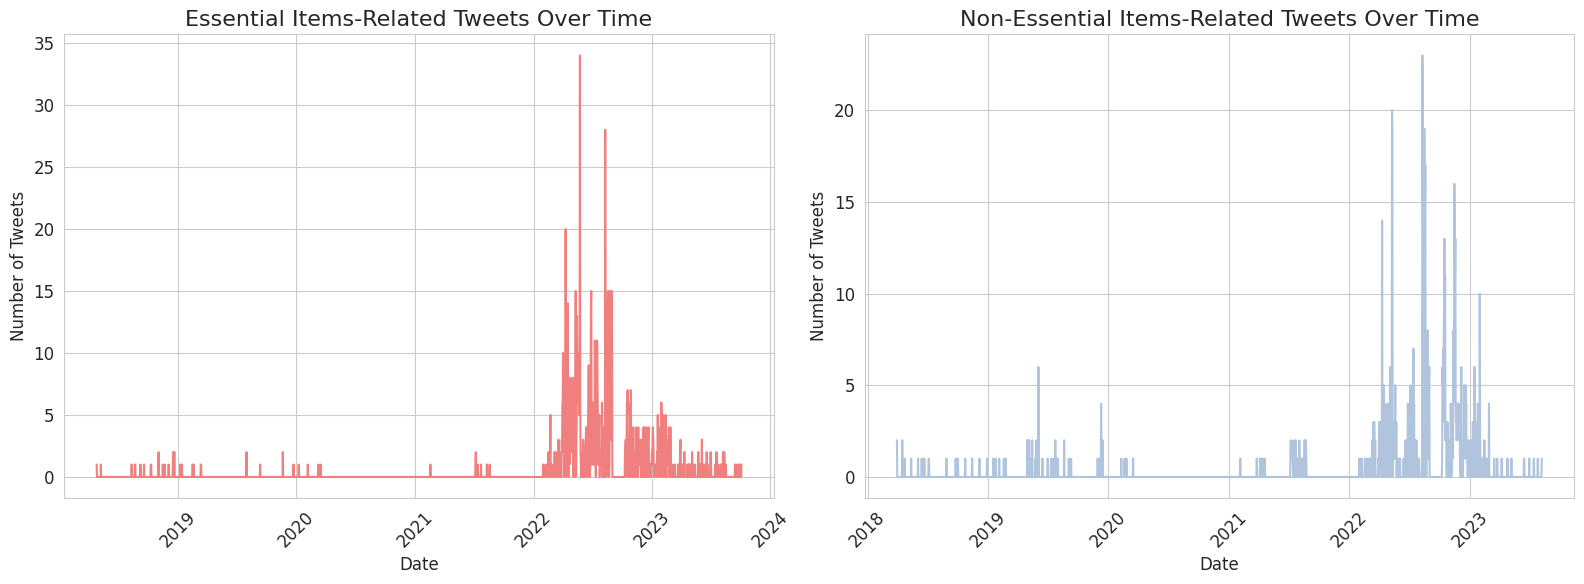

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/EDA_Dataset_Final.csv')
data = data.drop('Unnamed: 0', axis=1)

essential_items_related_keywords = [
    'food', 'hunger', 'rations', 'meal', 'milk', 'rice', 'essentialfoods',
    'food items', 'food crisis', 'water', 'sanitation', 'shelter', 'medicine', 'fuel', 'cement'
]

essential_items_related_data = data[data['cleaned_text'].str.contains('|'.join(essential_items_related_keywords), case=False, regex=True)]

essential_items_related_data['timestamp'] = pd.to_datetime(essential_items_related_data['timestamp'])
essential_items_related_data.set_index('timestamp', inplace=True)

essential_items_tweet_counts = essential_items_related_data.resample('D').size()

non_essential_items_related_keywords = [
    'electronics', 'fashion', 'jewellery', 'car', 'vehicles', 'entertainment', 'bike',
    'laptop', 'footwear', 'television', 'travel', 'wine'
]

non_essential_items_related_data = data[data['cleaned_text'].str.contains('|'.join(non_essential_items_related_keywords), case=False, regex=True)]

non_essential_items_related_data['timestamp'] = pd.to_datetime(non_essential_items_related_data['timestamp'])
non_essential_items_related_data.set_index('timestamp', inplace=True)

non_essential_items_tweet_counts = non_essential_items_related_data.resample('D').size()

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Essential Items-Related Tweets in pastel red
sns.set_style("whitegrid")
sns.color_palette("pastel")
sns.lineplot(data=essential_items_tweet_counts, ci=None, color='lightcoral', ax=axs[0])
axs[0].set_title('Essential Items-Related Tweets Over Time', fontsize=16)
axs[0].set_xlabel('Date', fontsize=12)
axs[0].set_ylabel('Number of Tweets', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45)

# Plot Non-Essential Items-Related Tweets in pastel blue
sns.set_style("whitegrid")
sns.color_palette("pastel")
sns.lineplot(data=non_essential_items_tweet_counts, ci=None, color='lightsteelblue', ax=axs[1])
axs[1].set_title('Non-Essential Items-Related Tweets Over Time', fontsize=16)
axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_ylabel('Number of Tweets', fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

##Line plot of essential and non essential item related tweets over time

Plotting line plot of essential and non-essential items over time to get an insight of how demand of essentials increased or decreased based on frequency number of tweets during those period of time.As it can be seen that tweets related to essential items increased during 2022 as protests rate were very high during at that time which led to declaration of emergency and thus essential commodities demand increased so people posted more number of tweets related to essential items hashtags like ”#foodcrisis”,”#food”,”#fuel” and ”#inflation”.

#CONCLUSION
The sentiment analysis of tweets related to the Sri Lanka crisis has provided valuable insights into the emotional landscape of the people during this challenging period.

The analysis revealed the timeline of sentiments, from fear and surprise during the lockdown period to a surge in joy when significant political changes took place.

It also highlighted the top concerns of the population, such as essential items and non-essential items, providing a comprehensive understanding of their priorities.

Additionally, identifying influential users can be a strategic approach to maintaining public sentiment and spreading solidarity during crisis times.

The insights gained from this analysis can serve as a useful resource for government organizations and other stakeholders to address the concerns of the citizens effectively and promote positive engagement.


By leveraging sentiment analysis, we can better understand and respond to the needs of the people during times of crisis, thereby working towards a more resilient and united Sri Lanka.
